In [20]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
from scipy import fft

In [21]:
path0n=r'C:\Users\user\Desktop\PDL dataset\0N'
path1n=r'C:\Users\user\Desktop\PDL dataset\1N'
path1w=r'C:\Users\user\Desktop\PDL dataset\1W'
path2w=r'C:\Users\user\Desktop\PDL dataset\2W'
path3n=r'C:\Users\user\Desktop\PDL dataset\3N'

In [22]:
filename0n = '2020.01.20.14.30.38.csv'
dataset0n=pd.read_csv(os.path.join(path0n, filename0n), sep=',',header=None)

In [23]:
dataset0n

,0,1,2,3,4,5
0,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.000,1.579531e+09,DAQ_9233,vertical_accel,-0.354297
1,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.001,1.579531e+09,DAQ_9233,vertical_accel,4.513043
2,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.002,1.579531e+09,DAQ_9233,vertical_accel,-15.471790
3,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.003,1.579531e+09,DAQ_9233,vertical_accel,-0.773306
4,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.004,1.579531e+09,DAQ_9233,vertical_accel,-3.094135
...,...,...,...,...,...,...
995,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.995,1.579531e+09,DAQ_9233,vertical_accel,2.159960
996,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.996,1.579531e+09,DAQ_9233,vertical_accel,-5.060364
997,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.997,1.579531e+09,DAQ_9233,vertical_accel,5.544489
998,5e2f32b155c77750bb92246b,2020-01-20T14:30:38.998,1.579531e+09,DAQ_9233,vertical_accel,2.417796


In [24]:
data0n=pd.DataFrame({'value':dataset0n[5] 
                   , 'fft':np.abs(np.fft.fft(dataset0n[5]))} )
data0n

,value,fft
0,-0.354297,754.624646
1,4.513043,46.922021
2,-15.471790,47.688499
3,-0.773306,34.724122
4,-3.094135,89.585724
...,...,...
995,2.159960,80.087055
996,-5.060364,89.585724
997,5.544489,34.724122
998,2.417796,47.688499


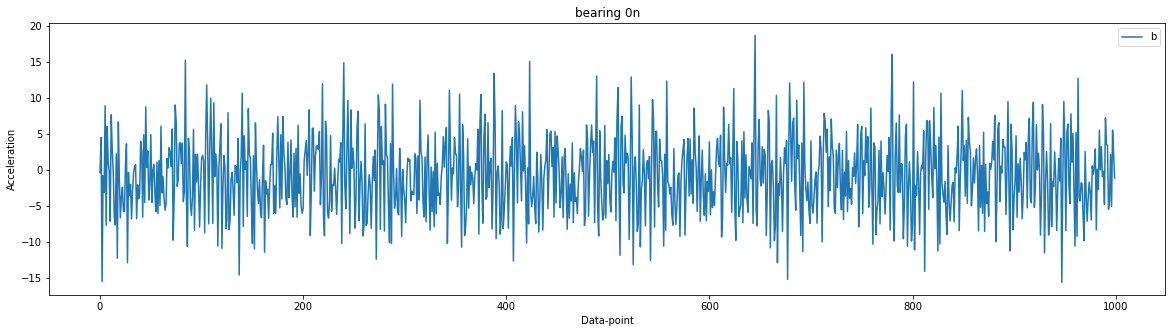

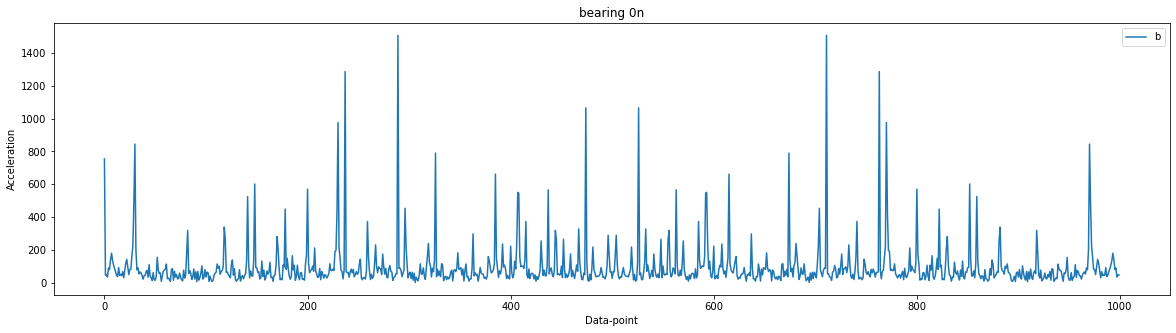

In [25]:
for i in [0,1]:
    
    df_bearing=np.array(data0n.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend('bearing 0n')

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('bearing 0n')
    plt.show()

In [26]:

zeron_feature_matrix=pd.DataFrame()
for filename in os.listdir(path0n):
    
    dataset=pd.read_csv(os.path.join(path0n, filename), sep=',',header=None)
    bearing_no=6
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,2))

    feature_matrix[0,0] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0,1] = np.sqrt(np.mean(np.abs(np.fft.fft(bearing_data)) ** 2))

    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    zeron_feature_matrix = zeron_feature_matrix.append(df)

In [27]:
zeron_feature_matrix

,0,1
2020.01.20.14.30.38.,5.493468,173.718707
2020.01.20.14.30.39.,5.392325,170.520285
2020.01.20.14.30.40.,5.388383,170.395624
2020.01.20.14.30.41.,5.411626,171.130654
2020.01.20.14.30.42.,5.519924,174.555317
2020.01.20.14.30.43.,5.398279,170.708561
2020.01.20.14.30.44.,5.282441,167.045461
2020.01.20.14.30.45.,5.276131,166.845903
2020.01.20.14.30.46.,5.312809,168.005775
2020.01.20.14.30.47.,5.286477,167.173084


In [28]:
zeron_feature_matrix.columns = ['RMS','Amplitude']
zeron_feature_matrix.index = pd.to_datetime(zeron_feature_matrix.index, format='%Y.%m.%d.%H.%M.%S.')

zeron_feature_matrix = zeron_feature_matrix.sort_index()
zeron_feature_matrix.to_csv('zeron_feature_matrix.csv')

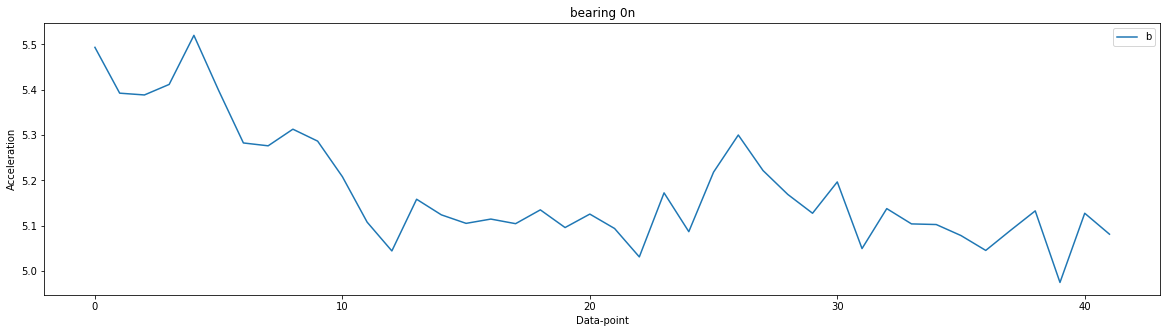

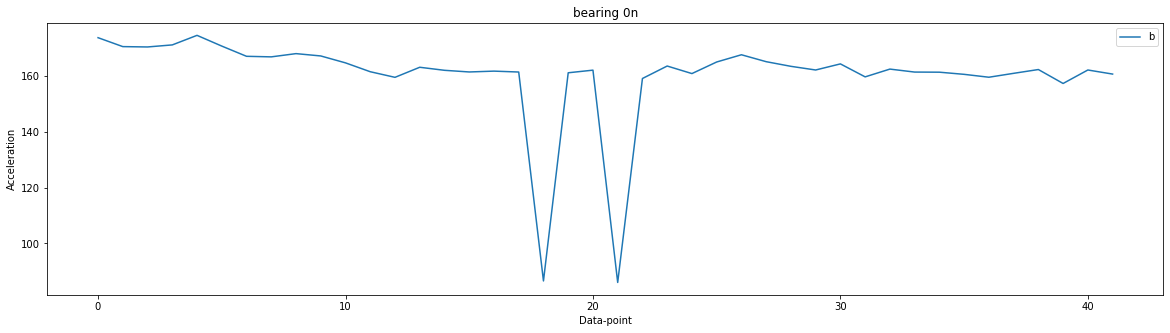

In [29]:
for i in [0,1]:
    
    df_bearing=np.array(zeron_feature_matrix.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend('bearing 0n')

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('bearing 0n')
    plt.show()

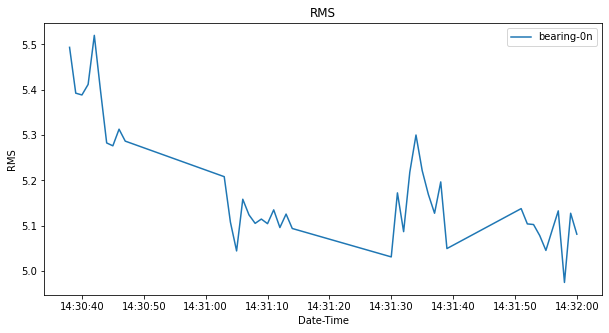

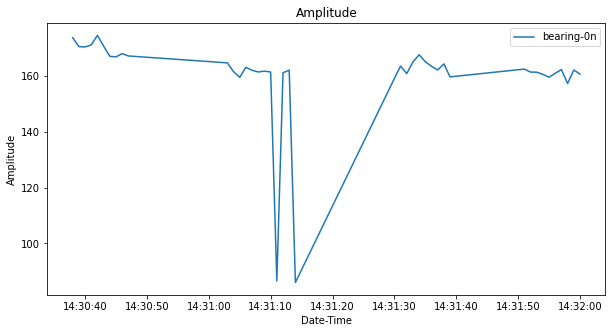

In [30]:
for col in (zeron_feature_matrix.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(zeron_feature_matrix.index,zeron_feature_matrix[col])
       

        plt.legend(['bearing-0n'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [31]:
onen_feature_matrix=pd.DataFrame()
for filename in os.listdir(path1n):
    
    dataset=pd.read_csv(os.path.join(path1n, filename), sep=',',header=None)
    bearing_no=6
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,2))

    feature_matrix[0,0] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0,1] = np.sqrt(np.mean(np.abs(np.fft.fft(bearing_data)) ** 2))

    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    onen_feature_matrix = onen_feature_matrix.append(df)

In [32]:
onen_feature_matrix

,0,1
2020.01.20.14.46.30.,7.982838,252.439491
2020.01.20.14.46.31.,7.950299,251.033141
2020.01.20.14.46.32.,7.890957,249.159380
2020.01.20.14.46.33.,7.802078,246.723370
2020.01.20.14.46.34.,7.830699,247.256732
2020.01.20.14.46.35.,7.782581,246.106816
2020.01.20.14.46.36.,7.816422,246.805912
2020.01.20.14.46.37.,7.675236,242.712277
2020.01.20.14.46.38.,7.720632,243.781322
2020.01.20.14.46.50.,7.586569,239.908390


In [33]:
onen_feature_matrix.columns = ['RMS','Amplitude']
onen_feature_matrix.index = pd.to_datetime(onen_feature_matrix.index, format='%Y.%m.%d.%H.%M.%S.')

onen_feature_matrix = onen_feature_matrix.sort_index()
onen_feature_matrix.to_csv('onen_feature_matrix.csv')

In [34]:
onew_feature_matrix=pd.DataFrame()
for filename in os.listdir(path1w):
    
    dataset=pd.read_csv(os.path.join(path1w, filename), sep=',',header=None)
    bearing_no=6
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,2))

    feature_matrix[0,0] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0,1] = np.sqrt(np.mean(np.abs(np.fft.fft(bearing_data)) ** 2))

    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    onew_feature_matrix = onew_feature_matrix.append(df)

In [35]:
onew_feature_matrix


,0,1
2020.01.24.08.51.32.,21.179471,669.753669
2020.01.24.08.51.52.,19.318642,610.909096
2020.01.24.08.51.53.,22.280939,443.385089
2020.01.24.08.51.54.,17.826233,563.714991
2020.01.24.08.51.55.,16.949359,337.287984
2020.01.24.08.51.56.,18.053572,570.904086
2020.01.24.08.51.57.,18.912416,598.063096
2020.01.24.08.51.58.,19.544228,388.925225
2020.01.24.08.52.28.,20.275495,641.167451
2020.01.24.08.52.29.,21.132731,668.275624


In [36]:
onew_feature_matrix.columns = ['RMS','Amplitude']
onew_feature_matrix.index = pd.to_datetime(onew_feature_matrix.index, format='%Y.%m.%d.%H.%M.%S.')

onew_feature_matrix = onew_feature_matrix.sort_index()
onew_feature_matrix.to_csv('onew_feature_matrix.csv')

In [37]:
twow_feature_matrix=pd.DataFrame()
for filename in os.listdir(path2w):
    
    dataset=pd.read_csv(os.path.join(path2w, filename), sep=',',header=None)
    bearing_no=6
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,2))

    feature_matrix[0,0] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0,1] = np.sqrt(np.mean(np.abs(np.fft.fft(bearing_data)) ** 2))

    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    twow_feature_matrix = twow_feature_matrix.append(df)

In [38]:
twow_feature_matrix.columns = ['RMS','Amplitude']
twow_feature_matrix.index = pd.to_datetime(twow_feature_matrix.index, format='%Y.%m.%d.%H.%M.%S.')

twow_feature_matrix = twow_feature_matrix.sort_index()
twow_feature_matrix.to_csv('twow_feature_matrix.csv')

In [39]:
threen_feature_matrix=pd.DataFrame()
for filename in os.listdir(path3n):
    
    dataset=pd.read_csv(os.path.join(path3n, filename), sep=',',header=None)
    bearing_no=6
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,2))

    feature_matrix[0,0] = np.sqrt(np.mean(bearing_data ** 2))
    feature_matrix[0,1] = np.sqrt(np.mean(np.abs(np.fft.fft(bearing_data)) ** 2))

    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    threen_feature_matrix = threen_feature_matrix.append(df)

In [40]:
threen_feature_matrix.columns = ['RMS','Amplitude']
threen_feature_matrix.index = pd.to_datetime(threen_feature_matrix.index, format='%Y.%m.%d.%H.%M.%S.')

threen_feature_matrix = threen_feature_matrix.sort_index()
threen_feature_matrix.to_csv('threen_feature_matrix.csv')

Text(0.5, 1.0, 'Filtered vibration in time domain')

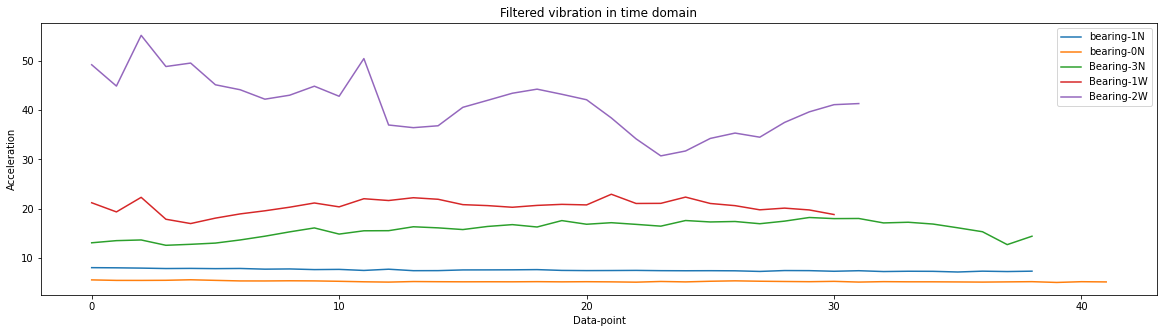

In [41]:
for i in [0]:

    df_bearing1=np.array(onen_feature_matrix.iloc[:,i])
    df_bearing2=np.array(zeron_feature_matrix.iloc[:,i])
    df_bearing3=np.array(threen_feature_matrix.iloc[:,i])
    df_bearing4=np.array(onew_feature_matrix.iloc[:,i])
    df_bearing5=np.array(twow_feature_matrix.iloc[:,i])



    plt.figure(figsize=(20, 5))
plt.plot(df_bearing1)
plt.plot(df_bearing2)
plt.plot(df_bearing3)
plt.plot(df_bearing4)
plt.plot(df_bearing5)

plt.legend(['bearing-1N','bearing-0N','Bearing-3N','Bearing-1W','Bearing-2W'])
plt.xlabel("Data-point")
plt.ylabel('Acceleration')
plt.title('Filtered vibration in time domain')

Text(0.5, 1.0, 'Filtered vibration in frequency domain')

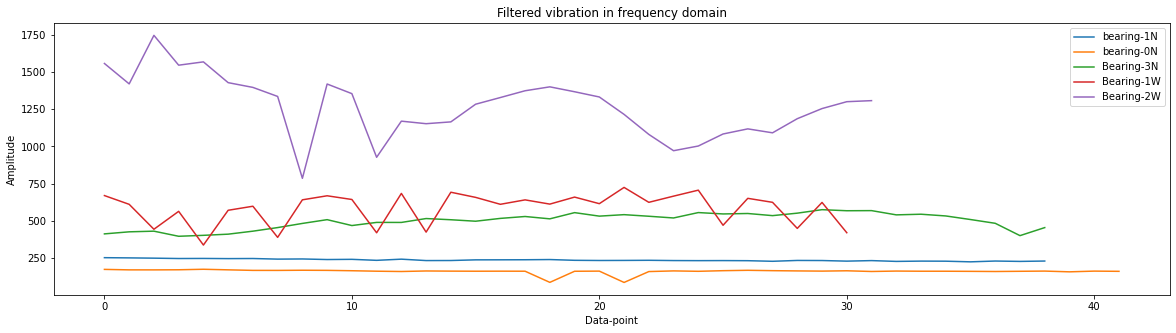

In [42]:
for i in [1]:

    df_bearing1=np.array(onen_feature_matrix.iloc[:,i])
    df_bearing2=np.array(zeron_feature_matrix.iloc[:,i])
    df_bearing3=np.array(threen_feature_matrix.iloc[:,i])
    df_bearing4=np.array(onew_feature_matrix.iloc[:,i])
    df_bearing5=np.array(twow_feature_matrix.iloc[:,i])



    plt.figure(figsize=(20, 5))
plt.plot(df_bearing1)
plt.plot(df_bearing2)
plt.plot(df_bearing3)
plt.plot(df_bearing4)
plt.plot(df_bearing5)

plt.legend(['bearing-1N','bearing-0N','Bearing-3N','Bearing-1W','Bearing-2W'])
plt.xlabel("Data-point")
plt.ylabel('Amplitude')
plt.title('Filtered vibration in frequency domain')

In [43]:
unbalance=[]
for i in range (0,len(onen_feature_matrix)):
    unbalance.append('1N')

onen_feature_matrix['unbalance']=unbalance
onen_feature_matrix

,RMS,Amplitude,unbalance
2020-01-20 14:46:30,7.982838,252.439491,1N
2020-01-20 14:46:31,7.950299,251.033141,1N
2020-01-20 14:46:32,7.890957,249.159380,1N
2020-01-20 14:46:33,7.802078,246.723370,1N
2020-01-20 14:46:34,7.830699,247.256732,1N
2020-01-20 14:46:35,7.782581,246.106816,1N
2020-01-20 14:46:36,7.816422,246.805912,1N
2020-01-20 14:46:37,7.675236,242.712277,1N
2020-01-20 14:46:38,7.720632,243.781322,1N
2020-01-20 14:46:50,7.586569,239.908390,1N


In [44]:
unbalance=[]
for i in range (0,len(zeron_feature_matrix)):
    unbalance.append('0N')

zeron_feature_matrix['unbalance']=unbalance
zeron_feature_matrix

,RMS,Amplitude,unbalance
2020-01-20 14:30:38,5.493468,173.718707,0N
2020-01-20 14:30:39,5.392325,170.520285,0N
2020-01-20 14:30:40,5.388383,170.395624,0N
2020-01-20 14:30:41,5.411626,171.130654,0N
2020-01-20 14:30:42,5.519924,174.555317,0N
2020-01-20 14:30:43,5.398279,170.708561,0N
2020-01-20 14:30:44,5.282441,167.045461,0N
2020-01-20 14:30:45,5.276131,166.845903,0N
2020-01-20 14:30:46,5.312809,168.005775,0N
2020-01-20 14:30:47,5.286477,167.173084,0N


In [45]:
unbalance=[]
for i in range (0,len(threen_feature_matrix)):
    unbalance.append('3N')

threen_feature_matrix['unbalance']=unbalance
threen_feature_matrix

,RMS,Amplitude,unbalance
2020-01-20 14:13:15,13.038015,412.298240,3N
2020-01-20 14:13:16,13.474690,426.107117,3N
2020-01-20 14:13:17,13.614425,430.525905,3N
2020-01-20 14:13:18,12.529235,396.209191,3N
2020-01-20 14:13:19,12.729426,402.539788,3N
2020-01-20 14:13:20,12.977955,410.398966,3N
2020-01-20 14:13:21,13.613865,430.508220,3N
2020-01-20 14:13:22,14.377291,454.649857,3N
2020-01-20 14:13:23,15.259280,482.540787,3N
2020-01-20 14:13:24,16.060063,507.863774,3N


In [46]:
unbalance=[]
for i in range (0,len(onew_feature_matrix)):
    unbalance.append('1W')

onew_feature_matrix['unbalance']=unbalance
onew_feature_matrix

,RMS,Amplitude,unbalance
2020-01-24 08:51:32,21.179471,669.753669,1W
2020-01-24 08:51:52,19.318642,610.909096,1W
2020-01-24 08:51:53,22.280939,443.385089,1W
2020-01-24 08:51:54,17.826233,563.714991,1W
2020-01-24 08:51:55,16.949359,337.287984,1W
2020-01-24 08:51:56,18.053572,570.904086,1W
2020-01-24 08:51:57,18.912416,598.063096,1W
2020-01-24 08:51:58,19.544228,388.925225,1W
2020-01-24 08:52:28,20.275495,641.167451,1W
2020-01-24 08:52:29,21.132731,668.275624,1W


In [47]:
unbalance=[]
for i in range (0,len(twow_feature_matrix)):
    unbalance.append('2W')

twow_feature_matrix['unbalance']=unbalance
twow_feature_matrix

,RMS,Amplitude,unbalance
2020-01-24 08:29:18,49.243981,1557.231407,2W
2020-01-24 08:29:19,44.907876,1420.111731,2W
2020-01-24 08:29:20,55.220539,1746.226782,2W
2020-01-24 08:29:21,48.882152,1545.789376,2W
2020-01-24 08:29:22,49.585930,1568.044783,2W
2020-01-24 08:29:23,45.171192,1428.438516,2W
2020-01-24 08:29:24,44.161625,1396.513216,2W
2020-01-24 08:29:25,42.241242,1335.785356,2W
2020-01-24 08:29:26,43.049350,785.576914,2W
2020-01-24 08:29:27,44.881798,1419.287083,2W


In [48]:
df = pd.concat([onen_feature_matrix,zeron_feature_matrix,threen_feature_matrix,onew_feature_matrix,twow_feature_matrix])
df

,RMS,Amplitude,unbalance
2020-01-20 14:46:30,7.982838,252.439491,1N
2020-01-20 14:46:31,7.950299,251.033141,1N
2020-01-20 14:46:32,7.890957,249.159380,1N
2020-01-20 14:46:33,7.802078,246.723370,1N
2020-01-20 14:46:34,7.830699,247.256732,1N
...,...,...,...
2020-01-24 08:47:42,34.511537,1091.350620,2W
2020-01-24 08:47:43,37.513507,1186.281248,2W
2020-01-24 08:47:44,39.664778,1254.310401,2W
2020-01-24 08:47:45,41.124825,1300.481153,2W


In [49]:
dfunbalance=df['unbalance']
dfunbalance

2020-01-20 14:46:30    1N
2020-01-20 14:46:31    1N
2020-01-20 14:46:32    1N
2020-01-20 14:46:33    1N
2020-01-20 14:46:34    1N
                       ..
2020-01-24 08:47:42    2W
2020-01-24 08:47:43    2W
2020-01-24 08:47:44    2W
2020-01-24 08:47:45    2W
2020-01-24 08:47:46    2W
Name: unbalance, Length: 183, dtype: object

In [50]:
dff=pd.DataFrame({'RMS':df['RMS'] ,
                   'amplitude':df['Amplitude']} )
dff

,RMS,amplitude
2020-01-20 14:46:30,7.982838,252.439491
2020-01-20 14:46:31,7.950299,251.033141
2020-01-20 14:46:32,7.890957,249.159380
2020-01-20 14:46:33,7.802078,246.723370
2020-01-20 14:46:34,7.830699,247.256732
...,...,...
2020-01-24 08:47:42,34.511537,1091.350620
2020-01-24 08:47:43,37.513507,1186.281248
2020-01-24 08:47:44,39.664778,1254.310401
2020-01-24 08:47:45,41.124825,1300.481153


In [51]:
from sklearn import preprocessing


In [52]:
coltono=['RMS','Amplitude']
mm_scaler = preprocessing.MinMaxScaler()
df[coltono] = mm_scaler.fit_transform(df[coltono])

In [53]:
df

,RMS,Amplitude,unbalance
2020-01-20 14:46:30,0.059871,0.100256,1N
2020-01-20 14:46:31,0.059223,0.099409,1N
2020-01-20 14:46:32,0.058042,0.098280,1N
2020-01-20 14:46:33,0.056273,0.096813,1N
2020-01-20 14:46:34,0.056843,0.097134,1N
...,...,...,...
2020-01-24 08:47:42,0.587847,0.605552,2W
2020-01-24 08:47:43,0.647593,0.662731,2W
2020-01-24 08:47:44,0.690408,0.703707,2W
2020-01-24 08:47:45,0.719466,0.731517,2W


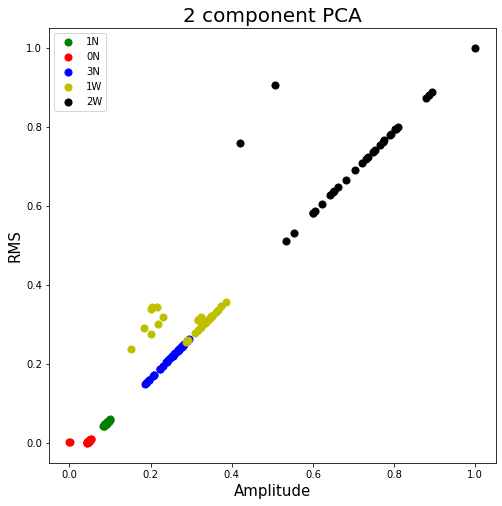

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Amplitude', fontsize = 15)
ax.set_ylabel('RMS', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['1N', '0N', '3N', '1W','2W']
colors = ['g', 'r','b','y','black']
for fault, color in zip(fault,colors):
    indicesToKeep = df['unbalance'] == fault
    ax.scatter(df.loc[indicesToKeep, 'Amplitude']
               , df.loc[indicesToKeep, 'RMS']
               , c = color
               , s = 50)
ax.legend(['1N', '0N', '3N', '1W','2W'])

In [55]:
test1n=pd.read_csv('onen_feature_matrix.csv' ,sep=',',index_col='Unnamed: 0')
test2w=pd.read_csv('twow_feature_matrix.csv',sep=',',index_col='Unnamed: 0')
test0n=pd.read_csv('zeron_feature_matrix.csv',sep=',',index_col='Unnamed: 0')
test1w=pd.read_csv('onew_feature_matrix.csv',sep=',',index_col='Unnamed: 0')
test3n=pd.read_csv('threen_feature_matrix.csv',sep=',',index_col='Unnamed: 0')

In [83]:
dataff = pd.concat([test0n,test1n,test3n,test1w,test2w])
dataff

,RMS,Amplitude
2020-01-20 14:30:38,5.493468,173.718707
2020-01-20 14:30:39,5.392325,170.520285
2020-01-20 14:30:40,5.388383,170.395624
2020-01-20 14:30:41,5.411626,171.130654
2020-01-20 14:30:42,5.519924,174.555317
...,...,...
2020-01-24 08:47:42,34.511537,1091.350620
2020-01-24 08:47:43,37.513507,1186.281248
2020-01-24 08:47:44,39.664778,1254.310401
2020-01-24 08:47:45,41.124825,1300.481153


In [84]:
import seaborn as sns


In [85]:
df['unbalance'].unique()


array(['1N', '0N', '3N', '1W', '2W'], dtype=object)

In [86]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

<AxesSubplot:>

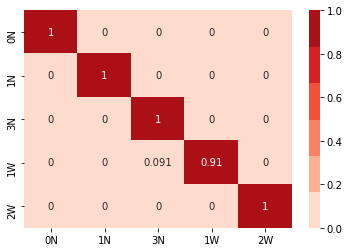

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
  
labels=['0N', '1N', '3N', '1W','2W']    
    
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred,labels=['0N', '1N', '3N', '1W','2W'], normalize ='true')
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap,xticklabels=labels, yticklabels=labels)

In [95]:
y_pred_test_2 = rf_model.predict(dataff)
y_pred_test_2

array(['2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2W',
       '2W', '2W', '2W', '2W', '2W', '2W', '2W', '2

In [96]:
dataff['unbalance']=y_pred_test_2


In [97]:
dataff.index = pd.to_datetime(dataff.index)


In [98]:
data = pd.concat([test0n,test1n,test3n,test1w,test2w])
data

,RMS,Amplitude
2020-01-20 14:30:38,5.493468,173.718707
2020-01-20 14:30:39,5.392325,170.520285
2020-01-20 14:30:40,5.388383,170.395624
2020-01-20 14:30:41,5.411626,171.130654
2020-01-20 14:30:42,5.519924,174.555317
...,...,...
2020-01-24 08:47:42,34.511537,1091.350620
2020-01-24 08:47:43,37.513507,1186.281248
2020-01-24 08:47:44,39.664778,1254.310401
2020-01-24 08:47:45,41.124825,1300.481153


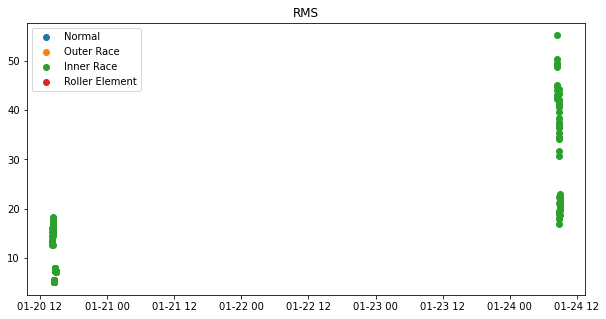

In [99]:

y_pred_test_2 = rf_model.predict(data)
data['unbalance']=y_pred_test_2
data.index = pd.to_datetime(data.index)


zeron = data[data['unbalance']=='0N']
onen = data[data['unbalance']=='1N']
twow = data[data['unbalance']=='2W']
onew = data[data['unbalance']=='1W']
threen = data[data['unbalance']=='3N']


###############################################################

col='RMS'                      # Change this value to any column name 
plt.figure(figsize=(10, 5))
plt.scatter(zeron.index,zeron[col])
plt.scatter(onen.index,onen[col])
plt.scatter(twow.index,twow[col])
plt.scatter(onew.index,onew[col])
plt.scatter(threen.index,threen[col])


plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

In [100]:
from sklearn import metrics

In [101]:
metrics.accuracy_score(y_test,y_pred)

0.9818181818181818

In [102]:
#knn

In [142]:
from sklearn.neighbors import KNeighborsClassifier
Xx = df.iloc[:,:-1]
yy = df.iloc[:,-1]
X_train2, X_test2, y_train2, y_test2 = train_test_split( Xx, yy, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train2, y_train2)

KNeighborsClassifier(metric='euclidean')

In [143]:
y_pred = knn.predict(X_test2)


In [144]:
y_pred

array(['1N', '0N', '0N', '3N', '3N', '0N', '2W', '3N', '2W', '3N', '1N',
       '1N', '1N', '1N', '3N', '1W', '1N', '1N', '1N', '0N', '0N', '0N',
       '1W', '2W', '1N', '2W', '1W', '0N', '0N', '3N', '2W', '3N', '3N',
       '0N', '1N', '2W', '2W', '2W', '3N', '0N', '1N', '1W', '0N', '1W',
       '2W', '1N'], dtype=object)

<AxesSubplot:xlabel='Amplitude', ylabel='RMS'>

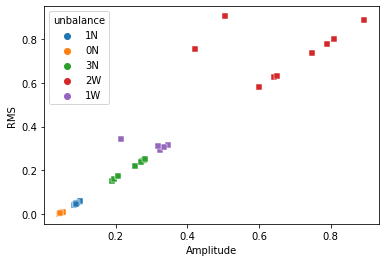

In [153]:
sns.scatterplot(
    x='Amplitude',
    y='RMS',
    marker='s',
    hue='unbalance',
    data=X_test2.join(y_test2, how='outer')
)

In [147]:
confusion_matrix(y_test2, y_pred)


array([[11,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

In [159]:
metrics.f1_score(y_test2,y_pred, labels='none', average='weighted')

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


1.0